In [2]:
# This script trains a linear regression model on a dataset and evaluates its performance.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [7]:
file_path = '../Datasets/Clean_Data_Preprocessed.csv'  # Use '..' to go up one level

df = pd.read_csv(file_path, encoding='ISO-8859-1')

df.head(10)

,Puissance administrative,Puissance maximale (kW),Consommation urbaine (l/100km),Consommation extra-urbaine (l/100km),Consommation mixte (l/100km),CO2 (g/km),CO type I (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),...,Carrosserie_MONOSPACE,Carrosserie_MONOSPACE COMPACT,Carrosserie_TS TERRAINS/CHEMINS,gamme_ECONOMIQUE,gamme_INFERIEURE,gamme_LUXE,gamme_MOY-INF,gamme_MOY-INFER,gamme_MOY-SUPER,gamme_SUPERIEURE
0,0.1375,0.249408,0.274939,0.247934,0.283262,0.284404,0.617861,0.016802,0.696969,0.003279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.1000,0.209357,0.160584,0.123967,0.167382,0.200000,0.194185,0.091057,0.567164,0.004918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0750,0.163845,0.160584,0.115702,0.167382,0.196330,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0750,0.163845,0.160584,0.115702,0.167382,0.196330,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.1000,0.209357,0.167883,0.123967,0.175966,0.205505,0.057113,0.088347,0.578358,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.1000,0.209357,0.167883,0.123967,0.175966,0.205505,0.057113,0.088347,0.578358,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.1375,0.249408,0.279805,0.264463,0.291845,0.291743,0.617861,0.016802,0.696969,0.003279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.1000,0.209357,0.163017,0.132231,0.171674,0.205505,0.194185,0.091057,0.567164,0.004918,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0750,0.163845,0.165450,0.123967,0.171674,0.201835,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0750,0.163845,0.165450,0.123967,0.171674,0.201835,0.063344,0.080217,0.511194,0.001639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
# Separating target feature from the remaining features
X = df.drop(columns=['CO2 (g/km)'])  # Features
y = df['CO2 (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", round(mse,6))


Mean Squared Error: 2.6e-05


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", round(mae,6))

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", round(rmse,6))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", round(r2,6))

mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))

Mean Absolute Error (MAE): 0.00266
Root Mean Squared Error (RMSE): 0.005086
R-squared (R2): 0.99459
Mean Absolute Percentage Error (MAPE): 0.00973
Median Absolute Error (MedAE): 0.001631
Max Error: 0.091257
Mean Squared Logarithmic Error (MSLE): 1.6e-05
R-squared Adjusted (R2 Adjusted): 0.994244
Explained Variance Score: 0.99459


In [5]:
from sklearn.decomposition import PCA
# Separating target feature from the remaining features
X = df.drop(columns=['CO2 (g/km)'])  # Features
y = df['CO2 (g/km)']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance

# Fit PCA on training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))

Mean Squared Error (MSE): 0.000592
Mean Absolute Error (MAE): 0.017638
Root Mean Squared Error (RMSE): 0.024329
R-squared (R2): 0.876186
Mean Absolute Percentage Error (MAPE): 0.062014
Median Absolute Error (MedAE): 0.013498
Max Error: 0.170917
Mean Squared Logarithmic Error (MSLE): 0.000351
R-squared Adjusted (R2 Adjusted): 0.868263
Explained Variance Score: 0.876187


In [6]:
from sklearn.linear_model import Ridge

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Ridge Regression model with a specific alpha (regularization strength)
alpha = 1.0  # We can adjust this value based on cross-validation
ridge_model = Ridge(alpha=alpha)

# Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 2.9e-05
Mean Absolute Error (MAE): 0.003036
Root Mean Squared Error (RMSE): 0.005351
R-squared (R2): 0.994011
Mean Absolute Percentage Error (MAPE): 0.010805
Median Absolute Error (MedAE): 0.002148
Max Error: 0.09206
Mean Squared Logarithmic Error (MSLE): 1.7e-05
R-squared Adjusted (R2 Adjusted): 0.993628
Explained Variance Score: 0.994011


In [7]:
from sklearn.linear_model import RidgeCV
import numpy as np
# Define a range of alpha values to try
alphas = [0.1, 1.0, 10.0]

# Initialize RidgeCV with the list of alphas and specify cv parameter for cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the model
ridge_cv.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = ridge_cv.alpha_
print("Optimal Alpha:", optimal_alpha)
# Make predictions on the test set
y_pred = ridge_cv.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))

Optimal Alpha: 0.1
Mean Squared Error (MSE): 2.7e-05
Mean Absolute Error (MAE): 0.002803
Root Mean Squared Error (RMSE): 0.005201
R-squared (R2): 0.994342
Mean Absolute Percentage Error (MAPE): 0.010141
Median Absolute Error (MedAE): 0.001923
Max Error: 0.092525
Mean Squared Logarithmic Error (MSLE): 1.6e-05
R-squared Adjusted (R2 Adjusted): 0.99398
Explained Variance Score: 0.994342


In [8]:
from sklearn.model_selection import GridSearchCV

# Apply dimensionality reduction technique (e.g., PCA)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Apply Ridge Regression with cross-validation
param_grid = {'alpha': [0.1, 1, 10]}  # Example alpha values
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = grid_search.best_params_['alpha']
print("Optimal Alpha:", optimal_alpha)

# Apply Ridge Regression with the optimal alpha
ridge_model = Ridge(alpha=optimal_alpha)
ridge_model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Optimal Alpha: 1
Mean Squared Error (MSE): 0.000588
Mean Absolute Error (MAE): 0.017591
Root Mean Squared Error (RMSE): 0.024243
R-squared (R2): 0.87706
Mean Absolute Percentage Error (MAPE): 0.061786
Median Absolute Error (MedAE): 0.01336
Max Error: 0.170499
Mean Squared Logarithmic Error (MSLE): 0.000348
R-squared Adjusted (R2 Adjusted): 0.876809
Explained Variance Score: 0.877062


In [9]:
from sklearn.linear_model import Lasso

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the Lasso Regression model
alpha = 0.1  # regularization parameter
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 0.004781
Mean Absolute Error (MAE): 0.051255
Root Mean Squared Error (RMSE): 0.069143
R-squared (R2): -3.8e-05
Mean Absolute Percentage Error (MAPE): 0.195764
Median Absolute Error (MedAE): 0.031214
Max Error: 0.203649
Mean Squared Logarithmic Error (MSLE): 0.002842
R-squared Adjusted (R2 Adjusted): -0.064028
Explained Variance Score: 0.0


In [10]:
from sklearn.model_selection import GridSearchCV

# Define the Lasso Regression model
lasso_model = Lasso()

# Define the alpha values to search
alphas = [0.01, 0.1, 1.0, 10.0]  # Example values

# Define the parameter grid
param_grid = {'alpha': alphas}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform GridSearchCV
grid_search.fit(X, y)

# Get the best alpha value
optimal_alpha = grid_search.best_params_['alpha']

# Print the optimal alpha value
print("Optimal Alpha:", optimal_alpha)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Lasso Regression model
lasso_model = Lasso(alpha=optimal_alpha)  # Use the optimal alpha obtained from GridSearchCV

# Train the Lasso Regression model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)
# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Optimal Alpha: 0.01
Mean Squared Error (MSE): 0.002982
Mean Absolute Error (MAE): 0.037452
Root Mean Squared Error (RMSE): 0.054605
R-squared (R2): 0.376282
Mean Absolute Percentage Error (MAPE): 0.140266
Median Absolute Error (MedAE): 0.023212
Max Error: 0.237502
Mean Squared Logarithmic Error (MSLE): 0.001758
R-squared Adjusted (R2 Adjusted): 0.336371
Explained Variance Score: 0.376283


In [11]:
from sklearn.linear_model import ElasticNet

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the ElasticNet Regression model
alpha = 0.1  # regularization parameter
l1_ratio = 0.5  # mixing parameter, 0.0 for L2 penalty, 1.0 for L1 penalty
elasticnet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elasticnet_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = elasticnet_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 0.004781
Mean Absolute Error (MAE): 0.051255
Root Mean Squared Error (RMSE): 0.069143
R-squared (R2): -3.8e-05
Mean Absolute Percentage Error (MAPE): 0.195764
Median Absolute Error (MedAE): 0.031214
Max Error: 0.203649
Mean Squared Logarithmic Error (MSLE): 0.002842
R-squared Adjusted (R2 Adjusted): -0.064028
Explained Variance Score: 0.0


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the ElasticNet model
elastic_net = ElasticNet()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Mixing parameter
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the ElasticNet model with the best hyperparameters
best_elastic_net = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'])
best_elastic_net.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_elastic_net.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)


print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Mean Squared Error (MSE): 0.000778
Mean Absolute Error (MAE): 0.018575
Root Mean Squared Error (RMSE): 0.027892
R-squared (R2): 0.83726
Mean Absolute Percentage Error (MAPE): 0.06638
Median Absolute Error (MedAE): 0.011893
Max Error: 0.186258
Mean Squared Logarithmic Error (MSLE): 0.000448
R-squared Adjusted (R2 Adjusted): 0.826846
Explained Variance Score: 0.837264


In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 5e-06
Mean Absolute Error (MAE): 0.000171
Root Mean Squared Error (RMSE): 0.002197
R-squared (R2): 0.99899
Mean Absolute Percentage Error (MAPE): 0.000686
Median Absolute Error (MedAE): 0.0
Max Error: 0.170642
Mean Squared Logarithmic Error (MSLE): 3e-06
R-squared Adjusted (R2 Adjusted): 0.998925
Explained Variance Score: 0.99899


In [14]:
from sklearn.decomposition import PCA


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize and train a decision tree regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the results
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 7.5e-05
Mean Absolute Error (MAE): 0.001316
Root Mean Squared Error (RMSE): 0.008683
R-squared (R2): 0.98423
Mean Absolute Percentage Error (MAPE): 0.005516
Median Absolute Error (MedAE): 0.0
Max Error: 0.255046
Mean Squared Logarithmic Error (MSLE): 4.5e-05
R-squared Adjusted (R2 Adjusted): 0.983221
Explained Variance Score: 0.98423


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using various metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 4e-06
Mean Absolute Error (MAE): 0.000201
Root Mean Squared Error (RMSE): 0.002062
R-squared (R2): 0.99911
Mean Absolute Percentage Error (MAPE): 0.000851
Median Absolute Error (MedAE): 0.0
Max Error: 0.152991
Mean Squared Logarithmic Error (MSLE): 3e-06
R-squared Adjusted (R2 Adjusted): 0.999053
Explained Variance Score: 0.99911


In [35]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize Bagging Regressor with Decision Tree base estimator
bagged_dt = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Fit the model
bagged_dt.fit(X_train, y_train)

# Make predictions
y_pred = bagged_dt.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


c:\Users\Halimeh\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (MSE): 5e-06
Mean Absolute Error (MAE): 0.000219
Root Mean Squared Error (RMSE): 0.00213
R-squared (R2): 0.999051
Mean Absolute Percentage Error (MAPE): 0.000938
Median Absolute Error (MedAE): 0.0
Max Error: 0.150826
Mean Squared Logarithmic Error (MSLE): 3e-06
R-squared Adjusted (R2 Adjusted): 0.998991
Explained Variance Score: 0.999051


In [17]:
from sklearn.svm import SVR

# Initialize Bagging Regressor with SVR base estimator
bagged_svm = BaggingRegressor(base_estimator=SVR(), n_estimators=20, random_state=42)

# Fit the model
bagged_svm.fit(X_train, y_train)

# Make predictions
y_pred = bagged_svm.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


c:\Users\Halimeh\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (MSE): 0.001666
Mean Absolute Error (MAE): 0.031755
Root Mean Squared Error (RMSE): 0.040816
R-squared (R2): 0.65152
Mean Absolute Percentage Error (MAPE): 0.115697
Median Absolute Error (MedAE): 0.021914
Max Error: 0.103569
Mean Squared Logarithmic Error (MSLE): 0.000986
R-squared Adjusted (R2 Adjusted): 0.629221
Explained Variance Score: 0.654758


In [22]:
from sklearn.ensemble import AdaBoostRegressor

# Initialize AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators=50, random_state=42)

# Fit the model
adaboost.fit(X_train, y_train)

# Make predictions
y_pred = adaboost.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 0.000178
Mean Absolute Error (MAE): 0.010845
Root Mean Squared Error (RMSE): 0.013347
R-squared (R2): 0.962735
Mean Absolute Percentage Error (MAPE): 0.035307
Median Absolute Error (MedAE): 0.008316
Max Error: 0.131194
Mean Squared Logarithmic Error (MSLE): 0.000102
R-squared Adjusted (R2 Adjusted): 0.960351
Explained Variance Score: 0.973949


In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred = gradient_boosting.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))

Mean Squared Error (MSE): 1.2e-05
Mean Absolute Error (MAE): 0.001656
Root Mean Squared Error (RMSE): 0.003405
R-squared (R2): 0.997574
Mean Absolute Percentage Error (MAPE): 0.006196
Median Absolute Error (MedAE): 0.00088
Max Error: 0.099021
Mean Squared Logarithmic Error (MSLE): 7e-06
R-squared Adjusted (R2 Adjusted): 0.997419
Explained Variance Score: 0.997575


In [25]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.3 MB/s eta 0:01:16
   ---------------------------------------- 0.3/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.5/99.8 MB 3.0 MB/s eta 0:00:34
   ---------------------------------------- 0.7/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 1.0/99.8 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.3/99.8 MB 4.3 MB/s eta 0:00:24
    --------------------------------------- 1.5/99.8 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.6/99.8 MB 4.2 MB/s eta 0:00:24
    -----------------------------------

In [37]:
import xgboost as xgb

# Initialize XGBRegressor
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=42)

# Fit the model
xgboost.fit(X_train, y_train)

# Make predictions
y_pred = xgboost.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


Mean Squared Error (MSE): 4e-06
Mean Absolute Error (MAE): 0.000387
Root Mean Squared Error (RMSE): 0.002066
R-squared (R2): 0.999107
Mean Absolute Percentage Error (MAPE): 0.001576
Median Absolute Error (MedAE): 7.8e-05
Max Error: 0.146001
Mean Squared Logarithmic Error (MSLE): 3e-06
R-squared Adjusted (R2 Adjusted): 0.99905
Explained Variance Score: 0.999107


In [28]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define input_shape based on the number of features in data
input_shape = X_train.shape[1]
# Initialize the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Max Error:", max_err)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("R-squared Adjusted (R2 Adjusted):", r2_adj)
print("Explained Variance Score:", evs)


c:\Users\Halimeh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0019 - mae: 0.0225 - mse: 0.0019 - val_loss: 7.1043e-05 - val_mae: 0.0064 - val_mse: 7.1043e-05
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 5.3076e-05 - mae: 0.0052 - mse: 5.3076e-05 - val_loss: 2.8747e-05 - val_mae: 0.0035 - val_mse: 2.8747e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.1739e-05 - mae: 0.0039 - mse: 3.1739e-05 - val_loss: 6.1002e-05 - val_mae: 0.0063 - val_mse: 6.1002e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3.2760e-05 - mae: 0.0039 - mse: 3.2760e-05 - val_loss: 3.1139e-05 - val_mae: 0.0036 - val_mse: 3.1139e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.6524e-05 - mae: 0.0036 - mse: 2.6524e-05 - val_loss: 3.8878e-05 - val_mae: 0.0050 - val_mse: 3.8878e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.7251e-05 - mae: 0.0036 - mse: 2.7251e-05 - val_loss: 2.9189e-05 - val_mae: 0.0043 - val_mse: 2.9189e-05
Epoch

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score

# Define input_shape based on the number of features in data
input_shape = X_train.shape[1]

# Initialize the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


c:\Users\Halimeh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 7.6286e-04 - mae: 0.0161 - mse: 7.6286e-04 - val_loss: 4.6518e-05 - val_mae: 0.0047 - val_mse: 4.6518e-05
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.1808e-05 - mae: 0.0051 - mse: 5.1808e-05 - val_loss: 6.5330e-05 - val_mae: 0.0069 - val_mse: 6.5330e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 3.7024e-05 - mae: 0.0042 - mse: 3.7024e-05 - val_loss: 2.6341e-05 - val_mae: 0.0031 - val_mse: 2.6341e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.6753e-05 - mae: 0.0036 - mse: 2.6753e-05 - val_loss: 2.8037e-05 - val_mae: 0.0040 - val_mse: 2.8037e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.3874e-05 - mae: 0.0034 - mse: 2.3874e-05 - val_loss: 1.7311e-05 - val_mae: 0.0023 - val_mse: 1.7311e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.3367e-05 - mae: 0.0033 - mse: 2.3367e-05 - val_loss: 1.6246e-05 - val_mae: 0.0025 - val_mse: 1.6246e-

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape the input data to fit the Conv1D layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=input_shape),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)  # You may need to define this function
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)  # You may need to define this function
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Median Absolute Error (MedAE):", medae)
print("Max Error:", max_err)
print("Mean Squared Logarithmic Error (MSLE):", msle)
print("R-squared Adjusted (R2 Adjusted):", r2_adj)
print("Explained Variance Score:", evs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.0023 - mae: 0.0231 - mse: 0.0023 - val_loss: 7.4508e-05 - val_mae: 0.0064 - val_mse: 7.4508e-05
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 19s 22ms/step - loss: 5.9634e-05 - mae: 0.0054 - mse: 5.9634e-05 - val_loss: 3.9756e-05 - val_mae: 0.0045 - val_mse: 3.9756e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - loss: 3.7791e-05 - mae: 0.0041 - mse: 3.7791e-05 - val_loss: 2.7864e-05 - val_mae: 0.0041 - val_mse: 2.7864e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 2.6193e-05 - mae: 0.0035 - mse: 2.6193e-05 - val_loss: 1.8143e-05 - val_mae: 0.0025 - val_mse: 1.8143e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 2.0932e-05 - mae: 0.0029 - mse: 2.0932e-05 - val_loss: 1.2313e-05 - val_mae: 0.0019 - val_mse: 1.2313e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - loss: 1.8854e-05 - mae: 0.0029 - mse: 1.8854e-05 - val_loss: 2.4352e-05 - val_mae: 0.0038 - val_mse: 2.435

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score

# Reshape the input data to fit the Conv1D layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=input_shape),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)  # You may need to define this function
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)  # You may need to define this function
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


c:\Users\Halimeh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - loss: 0.0023 - mae: 0.0226 - mse: 0.0023 - val_loss: 4.5178e-05 - val_mae: 0.0044 - val_mse: 4.5178e-05
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 29s 33ms/step - loss: 4.6187e-05 - mae: 0.0045 - mse: 4.6187e-05 - val_loss: 6.1874e-05 - val_mae: 0.0061 - val_mse: 6.1874e-05
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 36s 27ms/step - loss: 3.5249e-05 - mae: 0.0039 - mse: 3.5249e-05 - val_loss: 2.1725e-05 - val_mae: 0.0029 - val_mse: 2.1725e-05
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - loss: 2.9271e-05 - mae: 0.0036 - mse: 2.9271e-05 - val_loss: 2.2533e-05 - val_mae: 0.0030 - val_mse: 2.2533e-05
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 30s 33ms/step - loss: 2.3251e-05 - mae: 0.0032 - mse: 2.3251e-05 - val_loss: 1.5978e-05 - val_mae: 0.0023 - val_mse: 1.5978e-05
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 28s 32ms/step - loss: 2.2323e-05 - mae: 0.0031 - mse: 2.2323e-05 - val_loss: 1.5446e-05 - val_mae: 0.0027 - val_mse: 1.544

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Reshape the input data to fit the RNN layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=input_shape),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32)

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)  # You may need to define this function
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)  # You may need to define this function
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse,6))
print("Mean Absolute Error (MAE):", round(mae,6))
print("Root Mean Squared Error (RMSE):", round(rmse,6))
print("R-squared (R2):", round(r2,6))
print("Mean Absolute Percentage Error (MAPE):", round(mape,6))
print("Median Absolute Error (MedAE):", round(medae,6))
print("Max Error:", round(max_err,6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle,6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj,6))
print("Explained Variance Score:", round(evs,6))


c:\Users\Halimeh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 141s 151ms/step - loss: 0.0066 - mae: 0.0511 - mse: 0.0066 - val_loss: 0.0018 - val_mae: 0.0292 - val_mse: 0.0018
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 152s 171ms/step - loss: 0.0015 - mae: 0.0261 - mse: 0.0015 - val_loss: 0.0018 - val_mae: 0.0271 - val_mse: 0.0018
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 143s 162ms/step - loss: 0.0013 - mae: 0.0244 - mse: 0.0013 - val_loss: 0.0012 - val_mae: 0.0233 - val_mse: 0.0012
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 152s 172ms/step - loss: 0.0012 - mae: 0.0232 - mse: 0.0012 - val_loss: 0.0012 - val_mae: 0.0218 - val_mse: 0.0012
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 136s 154ms/step - loss: 0.0012 - mae: 0.0227 - mse: 0.0012 - val_loss: 0.0011 - val_mae: 0.0220 - val_mse: 0.0011
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 118s 133ms/step - loss: 0.0012 - mae: 0.0230 - mse: 0.0012 - val_loss: 0.0011 - val_mae: 0.0223 - val_mse: 0.0011
Epoch 7/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 116s 131ms/step - loss: 0.001

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, max_error, mean_squared_log_error, explained_variance_score

# Reshape the input data to fit the RNN layer
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define input_shape based on the shape of the input data
input_shape = X_train_reshaped.shape[1:]

# Initialize the model
model = Sequential([
    SimpleRNN(32, activation='relu', input_shape=input_shape),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_reshaped, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred = model.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)
max_err = max_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2_adj = 1 - (1-r2) * (len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
evs = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", round(mse, 6))
print("Mean Absolute Error (MAE):", round(mae, 6))
print("Root Mean Squared Error (RMSE):", round(rmse, 6))
print("R-squared (R2):", round(r2, 6))
print("Mean Absolute Percentage Error (MAPE):", round(mape, 6))
print("Median Absolute Error (MedAE):", round(medae, 6))
print("Max Error:", round(max_err, 6))
print("Mean Squared Logarithmic Error (MSLE):", round(msle, 6))
print("R-squared Adjusted (R2 Adjusted):", round(r2_adj, 6))
print("Explained Variance Score:", round(evs, 6))


c:\Users\Halimeh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 64s 69ms/step - loss: 0.0058 - mae: 0.0485 - mse: 0.0058 - val_loss: 0.0018 - val_mae: 0.0267 - val_mse: 0.0018
Epoch 2/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 64s 72ms/step - loss: 0.0018 - mae: 0.0284 - mse: 0.0018 - val_loss: 0.0024 - val_mae: 0.0336 - val_mse: 0.0024
Epoch 3/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 64s 73ms/step - loss: 0.0022 - mae: 0.0320 - mse: 0.0022 - val_loss: 0.0020 - val_mae: 0.0316 - val_mse: 0.0020
Epoch 4/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 64s 73ms/step - loss: 0.0017 - mae: 0.0272 - mse: 0.0017 - val_loss: 0.0015 - val_mae: 0.0255 - val_mse: 0.0015
Epoch 5/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - loss: 0.0015 - mae: 0.0254 - mse: 0.0015 - val_loss: 0.0014 - val_mae: 0.0234 - val_mse: 0.0014
Epoch 6/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 60s 68ms/step - loss: 0.0014 - mae: 0.0241 - mse: 0.0014 - val_loss: 0.0013 - val_mae: 0.0225 - val_mse: 0.0013
Epoch 7/100
885/885 ━━━━━━━━━━━━━━━━━━━━ 67s 76ms/step - loss: 0.0013 - mae: 0.023

In [7]:
df.info

<bound method DataFrame.info of        Puissance administrative  Puissance maximale (kW)  \
0                        0.1375                 0.249408   
1                        0.1000                 0.209357   
2                        0.0750                 0.163845   
3                        0.0750                 0.163845   
4                        0.1000                 0.209357   
...                         ...                      ...   
44226                    0.1125                 0.200255   
44227                    0.1000                 0.200255   
44228                    0.1000                 0.200255   
44229                    0.1000                 0.200255   
44230                    0.2500                 0.389587   

       Consommation urbaine (l/100km)  Consommation extra-urbaine (l/100km)  \
0                            0.274939                              0.247934   
1                            0.160584                              0.123967   
2         

c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

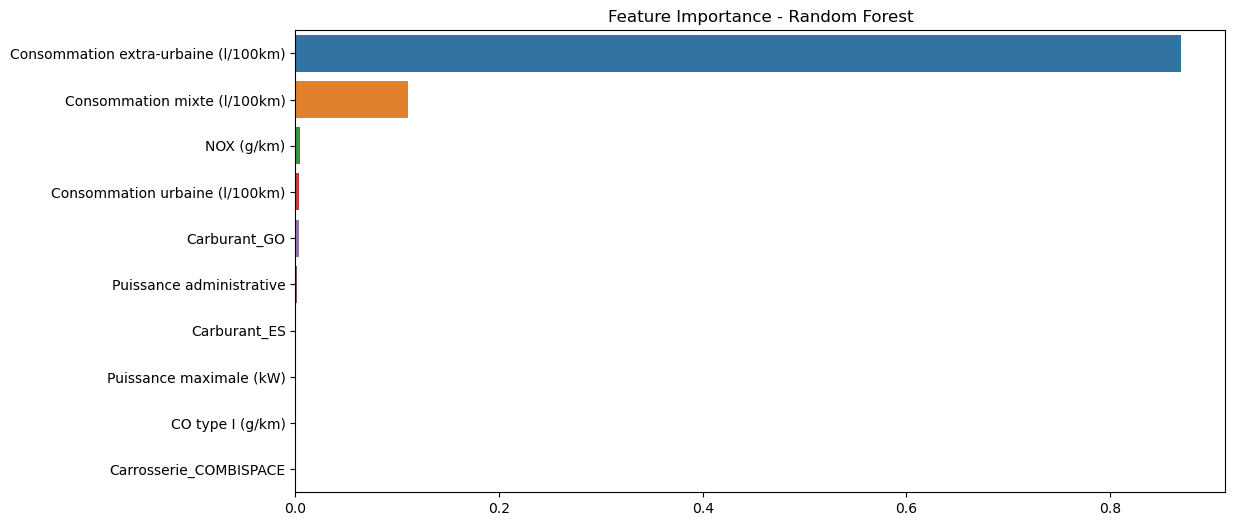

c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

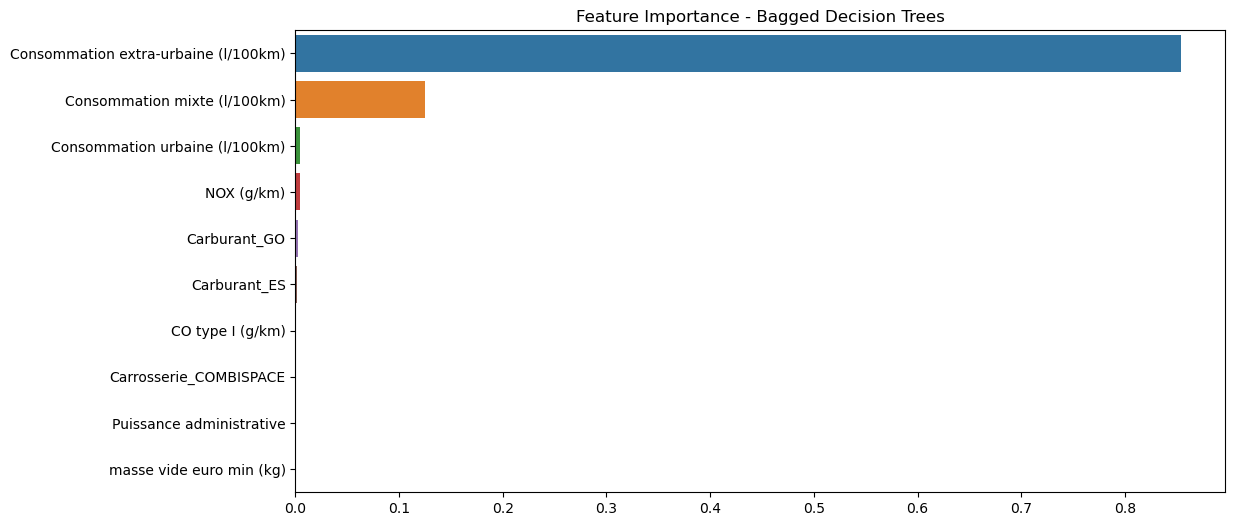

c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

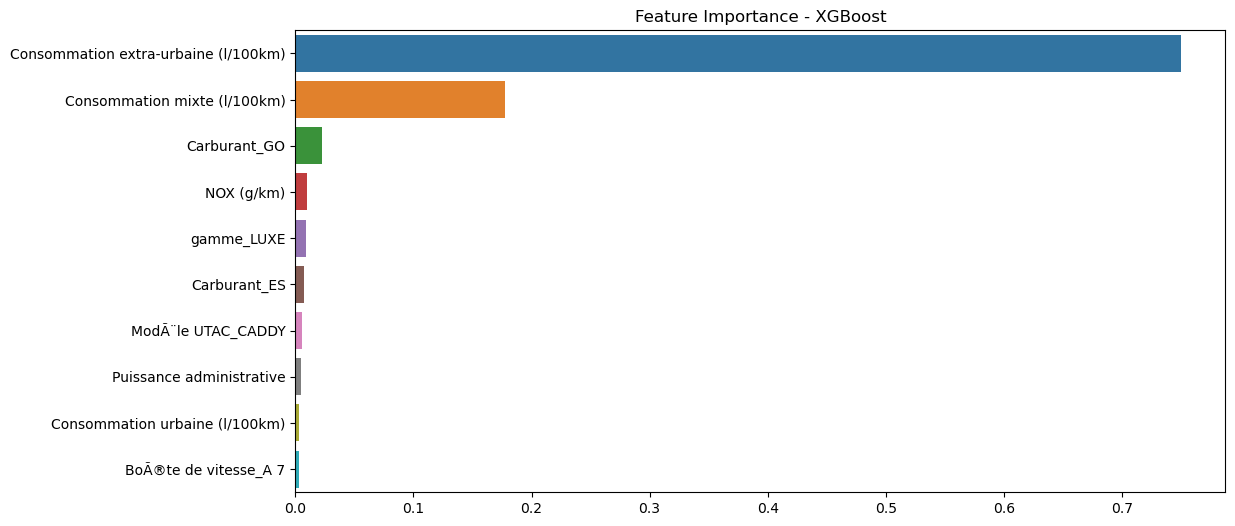

c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

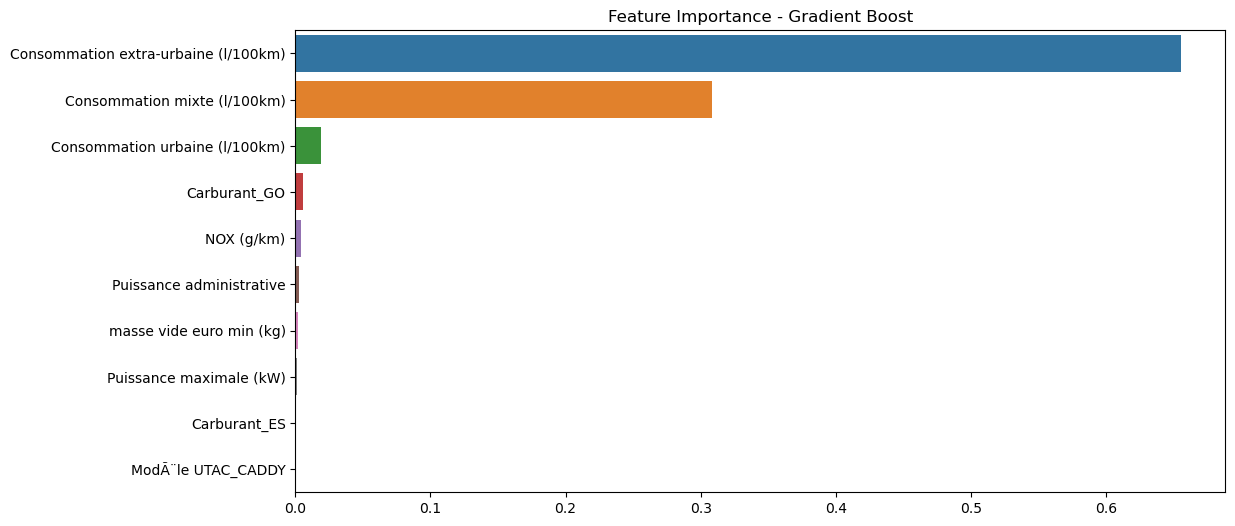

c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Halimeh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

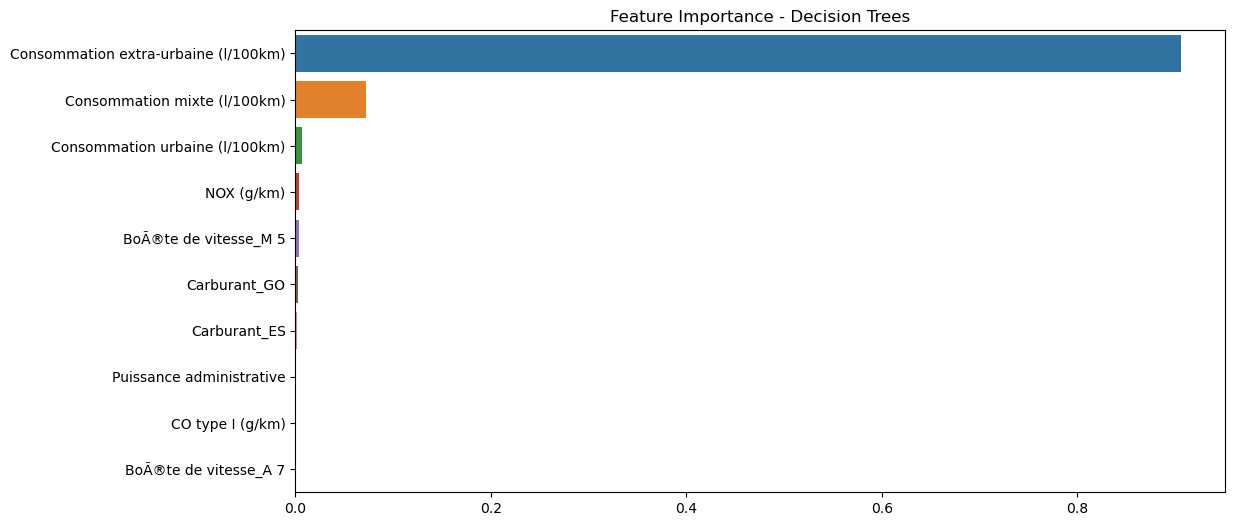

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot Feature Importance for each model
models = [rf_model, bagged_dt, xgboost, gradient_boosting, dt_regressor]
model_names = ['Random Forest', 'Bagged Decision Trees', 'XGBoost', 'Gradient Boost', 'Decision Trees']

for model, name in zip(models, model_names):
    if name == 'Bagged Decision Trees':
        importances = np.mean([estimator.feature_importances_ for estimator in model.estimators_], axis=0)
    else:
        importances = model.feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title(f"Feature Importance - {name}")
    sns.barplot(x=importances[indices][:10], y=[X.columns[i] for i in indices][:10])
    plt.show()

In [19]:
pip install --user shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/40/6c/850cdf7d0c6351ee9d060c0a24237381ae212c125553afa61198eaa06b0b/shap-0.45.1-cp311-cp311-win_amd64.whl.metadata
  Using cached shap-0.45.1-cp311-cp311-win_amd64.whl.metadata (25 kB)
Using cached shap-0.45.1-cp311-cp311-win_amd64.whl (455 kB)
Note: you may need to restart the kernel to use updated packages.


  0%|          | 0/1000 [00:00<?, ?it/s]

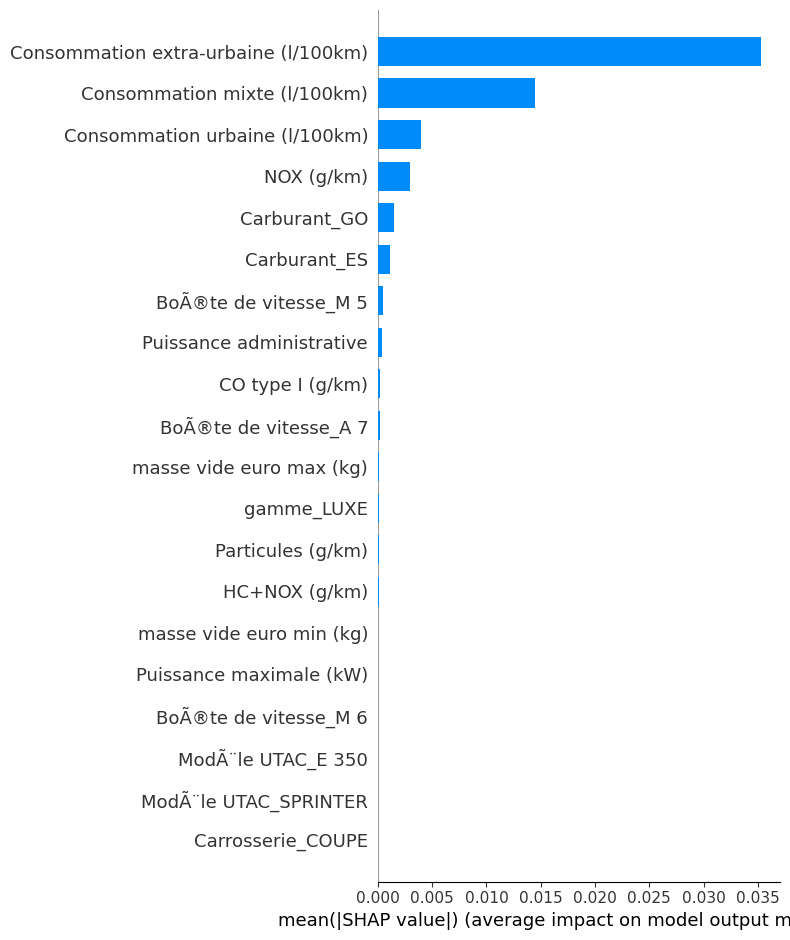

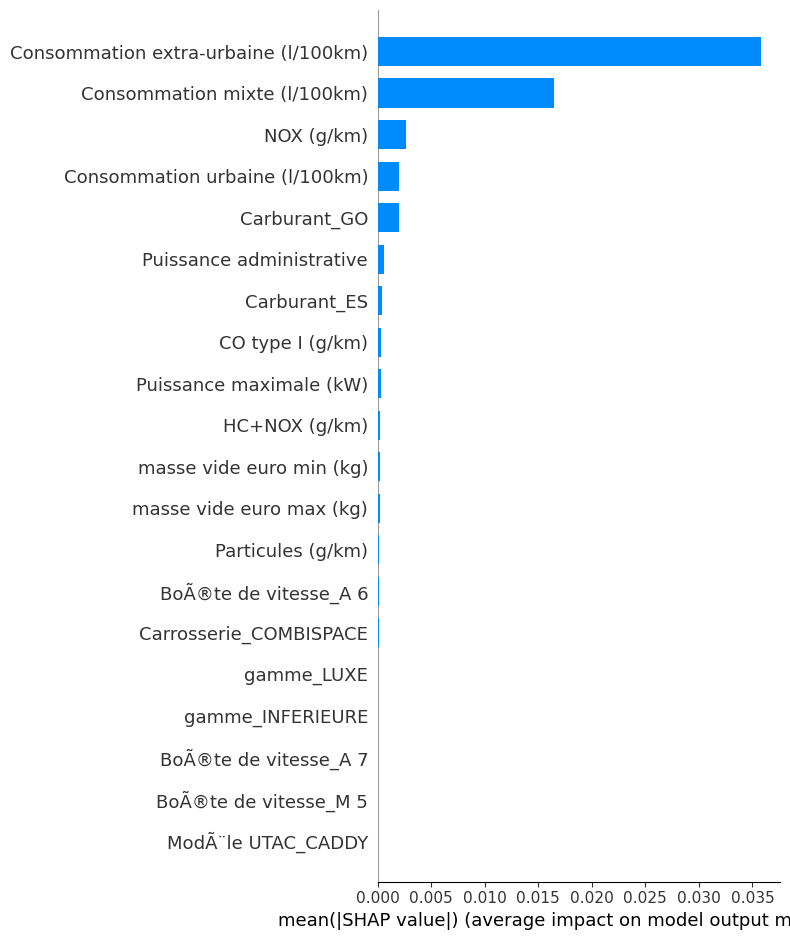

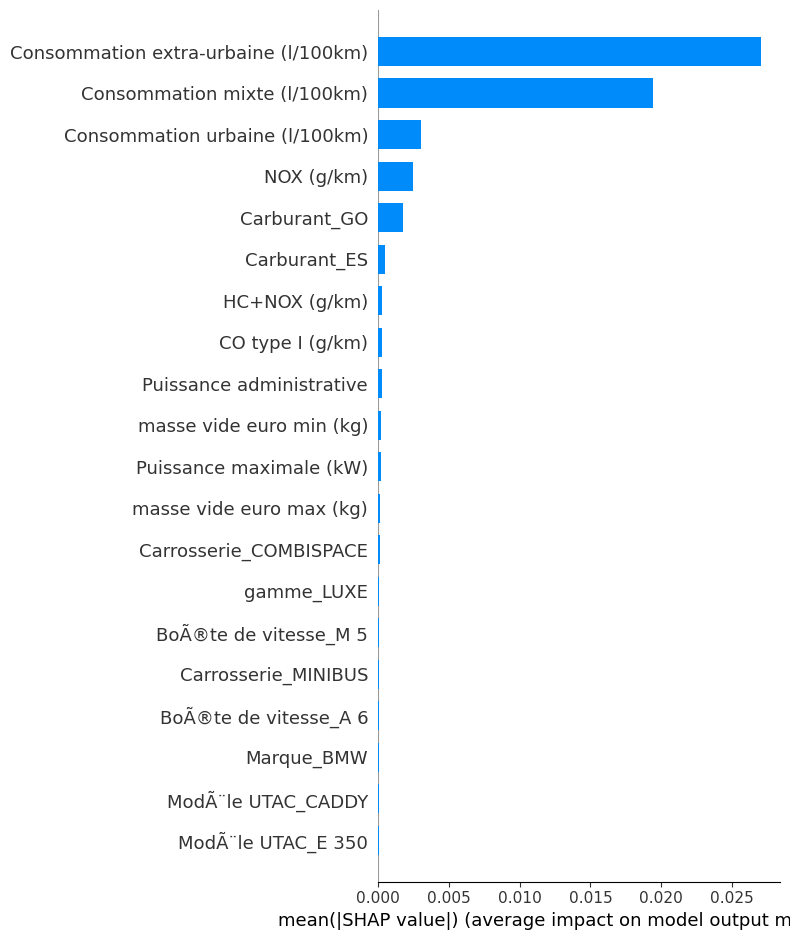

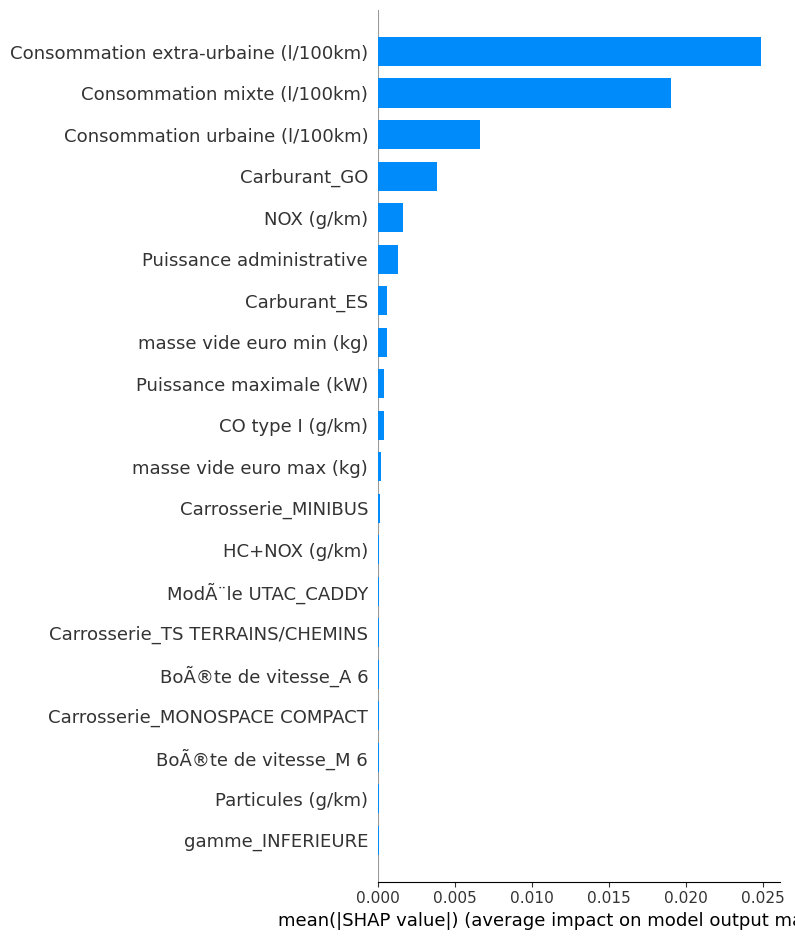

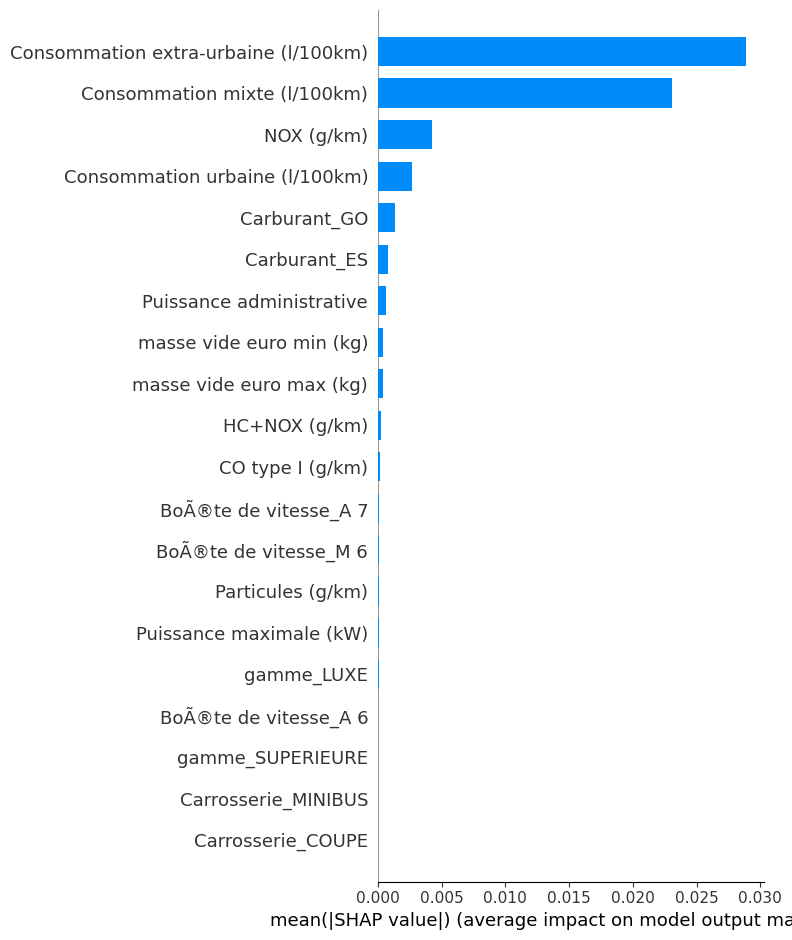

In [23]:
import shap
import numpy as np

# Sample a subset of your data (e.g., 1000 rows)
sampled_data = X.sample(1000, random_state=1)
background_data = sampled_data.sample(100, random_state=1)

# Initialize SHAP explainers for each model
dt_explainer = shap.TreeExplainer(dt_regressor)
rf_explainer = shap.TreeExplainer(rf_model)
bagged_dt_explainer = shap.KernelExplainer(bagged_dt.predict, background_data)
gradient_boosting_explainer = shap.TreeExplainer(gradient_boosting)
xgboost_explainer = shap.TreeExplainer(xgboost)

# Compute SHAP values
dt_shap_values = dt_explainer.shap_values(sampled_data)
rf_shap_values = rf_explainer.shap_values(sampled_data)
bagged_dt_shap_values = bagged_dt_explainer.shap_values(sampled_data, nsamples=100)  # Reduce nsamples if computation is too slow
gradient_boosting_shap_values = gradient_boosting_explainer.shap_values(sampled_data)
xgboost_shap_values = xgboost_explainer.shap_values(sampled_data)

# Visualize SHAP values
shap.summary_plot(dt_shap_values, sampled_data, plot_type="bar", title="Decision Trees")
shap.summary_plot(rf_shap_values, sampled_data, plot_type="bar", title="Random Forest")
shap.summary_plot(bagged_dt_shap_values, sampled_data, plot_type="bar", title="Bagged Decision Trees")
shap.summary_plot(gradient_boosting_shap_values, sampled_data, plot_type="bar", title="Gradient Boosting")
shap.summary_plot(xgboost_shap_values, sampled_data, plot_type="bar", title="XGBoost")


In [24]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ----- ------------------------------- 41.0/275.7 kB 393.8 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=fd6f5fa377c41e3d4f4fab71cb44358f9974a34e66ed23fd27051b9bcdd59f30
  Stored in directory: c:\users\halimeh\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


c:\Users\Halimeh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Intercept 0.2759858366263145
Prediction_local [0.39411284]
Right: 0.47155963302752424


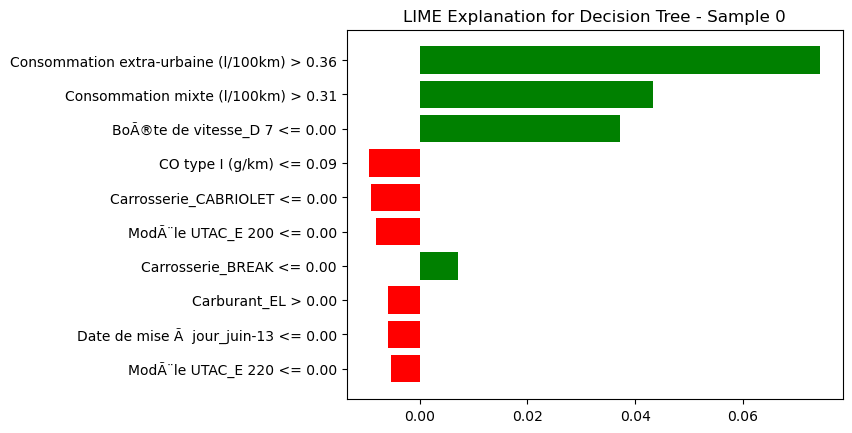

c:\Users\Halimeh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Intercept 0.25368333035143104
Prediction_local [0.37596162]
Right: 0.471559633027524


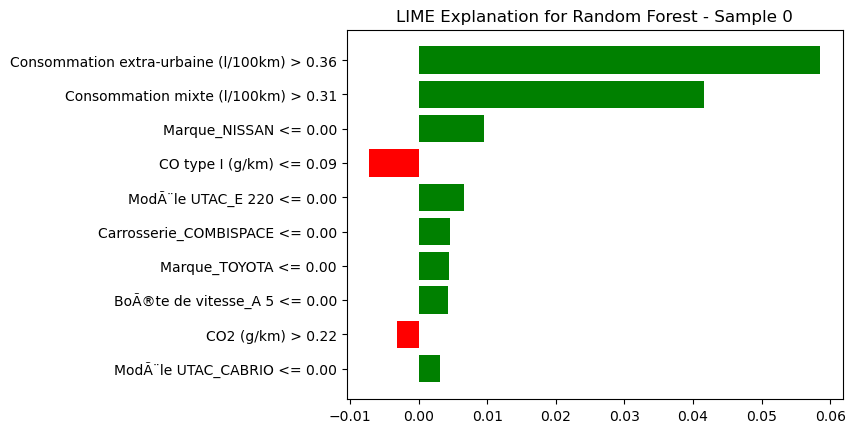

c:\Users\Halimeh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


Intercept 0.26056496423032594
Prediction_local [0.38145327]
Right: 0.47155963302752335


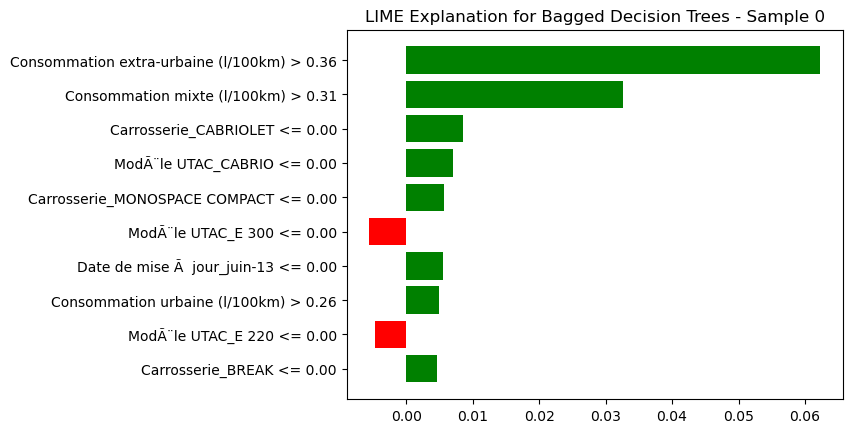

c:\Users\Halimeh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Intercept 0.26771971615473467
Prediction_local [0.37790329]
Right: 0.4714940388184291


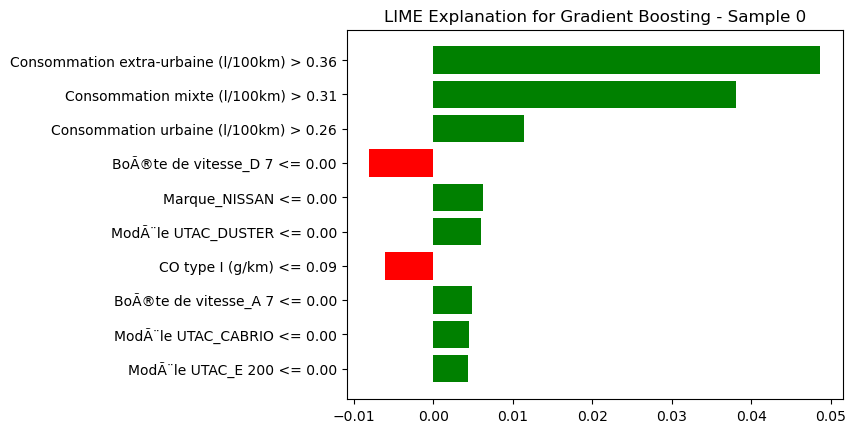

Intercept 0.24930052352197332
Prediction_local [0.37508202]
Right: 0.47150582


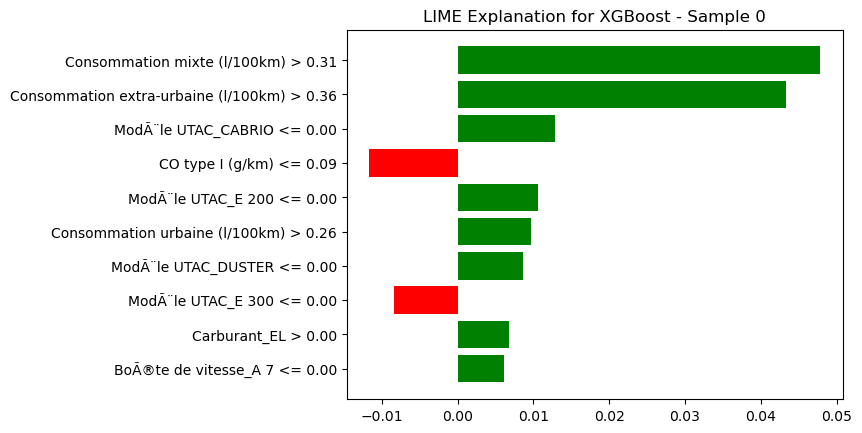

In [47]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Ensure X_train is a NumPy array
X_train = X_train.values if hasattr(X_train, 'values') else X_train
X_test = X_test.values if hasattr(X_test, 'values') else X_test

feature_names = df.columns.tolist()

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=['Target'],
    verbose=True,
    mode='regression'
)

# Function to generate LIME explanations and visualize them
def plot_lime_explanation(model, model_name, sample_index):
    # Get a sample from the test set
    sample = X_test[sample_index].reshape(1, -1)
    
    # Explain the prediction for the sample
    exp = explainer.explain_instance(
        sample.flatten(),
        model.predict,
        num_features=10
    )
    
    # Plot the explanation
    fig = exp.as_pyplot_figure()
    plt.title(f'LIME Explanation for {model_name} - Sample {sample_index}')
    plt.show()

# List of models and their names
models = [
    (dt_regressor, 'Decision Tree'),
    (rf_model, 'Random Forest'),
    (bagged_dt, 'Bagged Decision Trees'),
    (gradient_boosting, 'Gradient Boosting'),
    (xgboost, 'XGBoost')
]

# Generate and plot LIME explanations for a sample index
sample_index = 0  # You can change this to any index of your choice

for model, model_name in models:
    plot_lime_explanation(model, model_name, sample_index)


Plotting PDP for Decision Tree


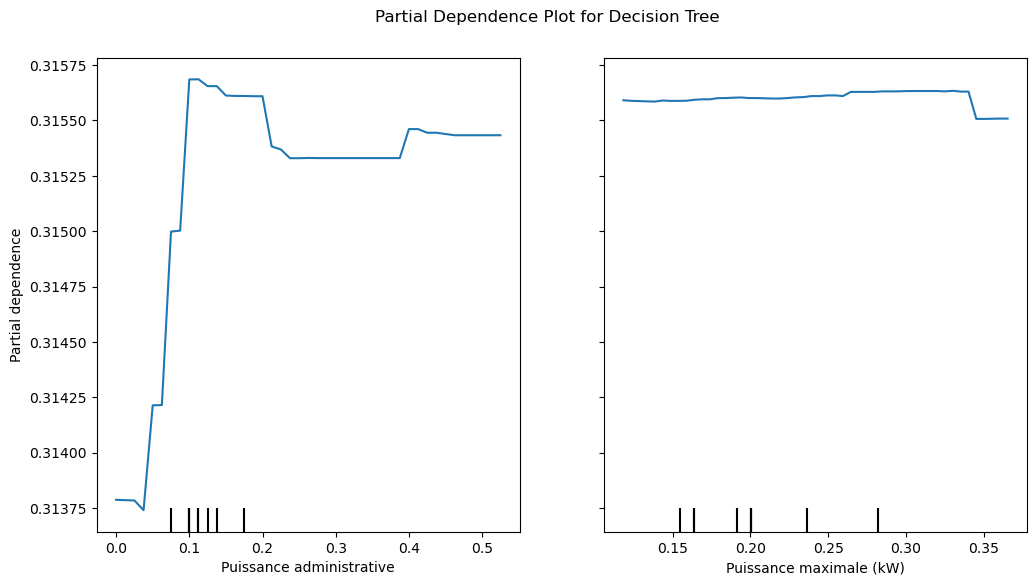

Plotting PDP for Random Forest


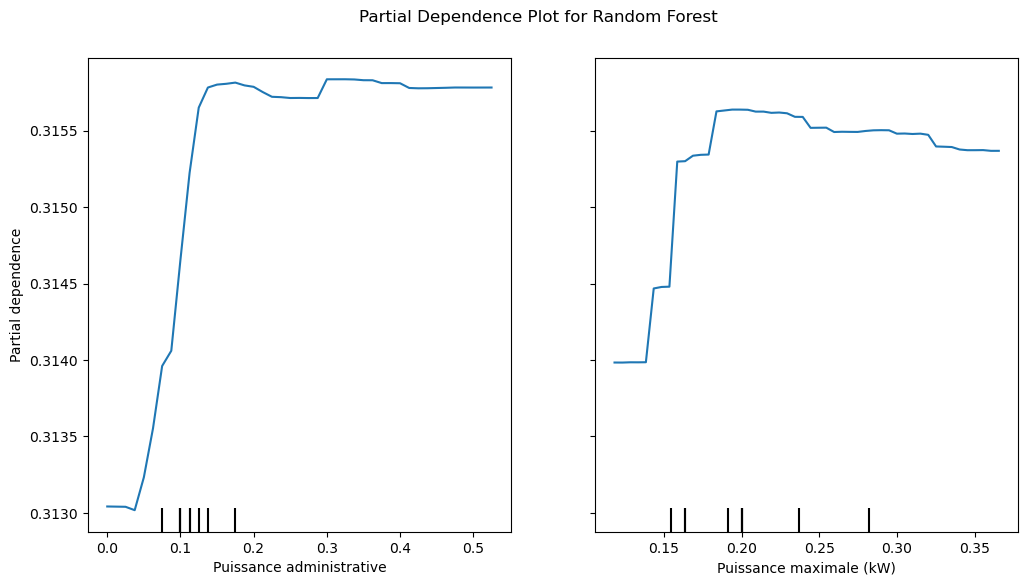

Plotting PDP for Bagged Decision Trees


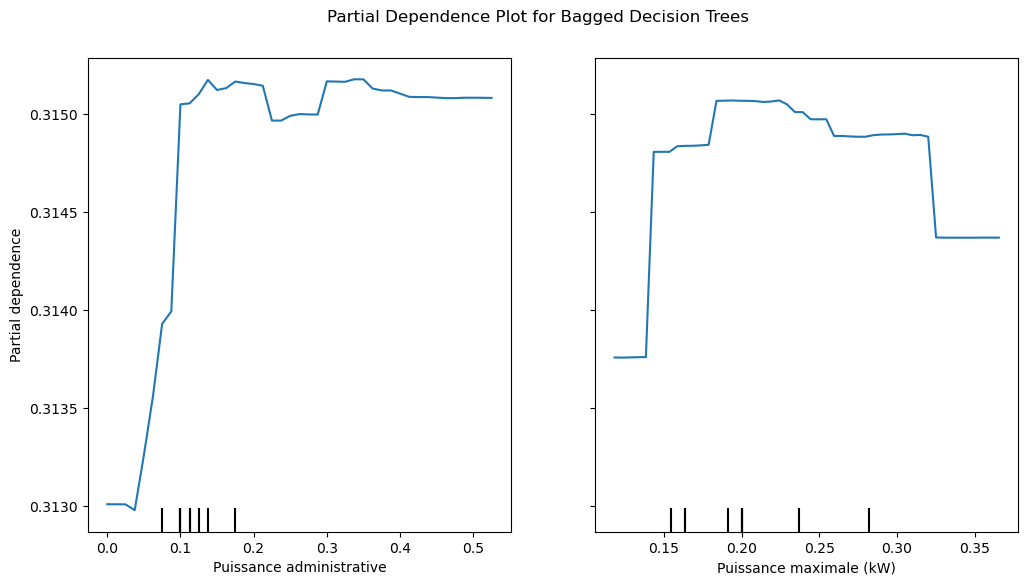

Plotting PDP for Gradient Boost


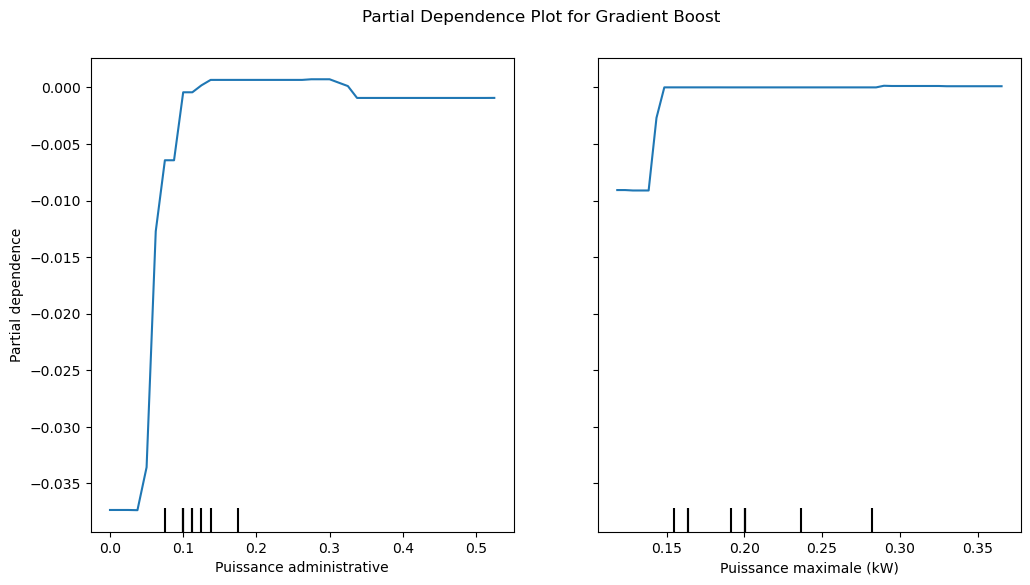

Plotting PDP for XGBoost


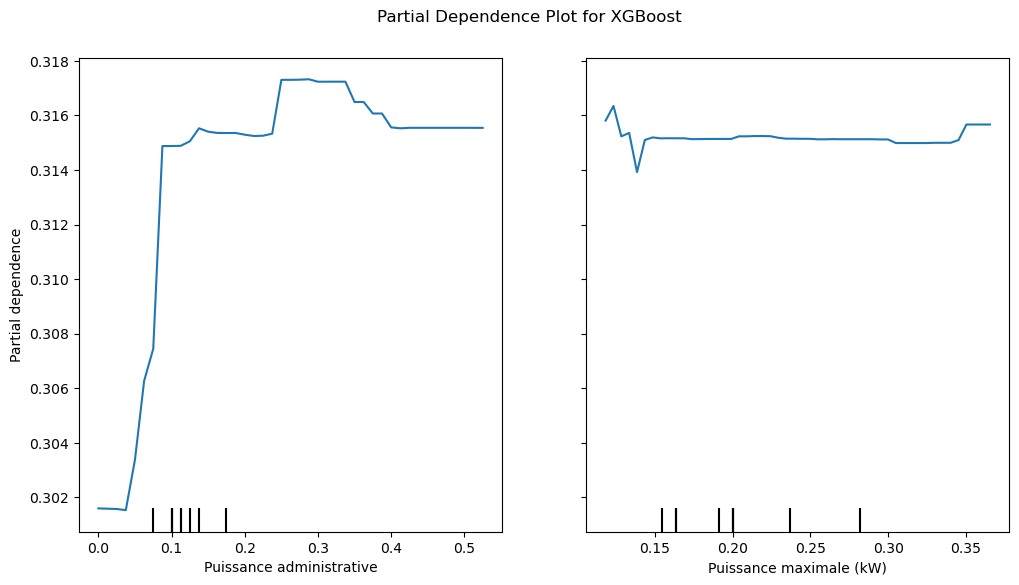

In [27]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay


models = [
    ('Decision Tree', dt_regressor),
    ('Random Forest', rf_model),
    ('Bagged Decision Trees', bagged_dt),
    ('Gradient Boost', gradient_boosting),
    ('XGBoost', xgboost)
]

# Features for which to plot PDPs 
features = [0, 1]  # We can change these to the indices or names of the features we want to plot

for name, model in models:
    print(f"Plotting PDP for {name}")
    fig, ax = plt.subplots(figsize=(12, 6))
    pdp_display = PartialDependenceDisplay.from_estimator(model, X_test, features, ax=ax, grid_resolution=50)
    plt.suptitle(f'Partial Dependence Plot for {name}')
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()


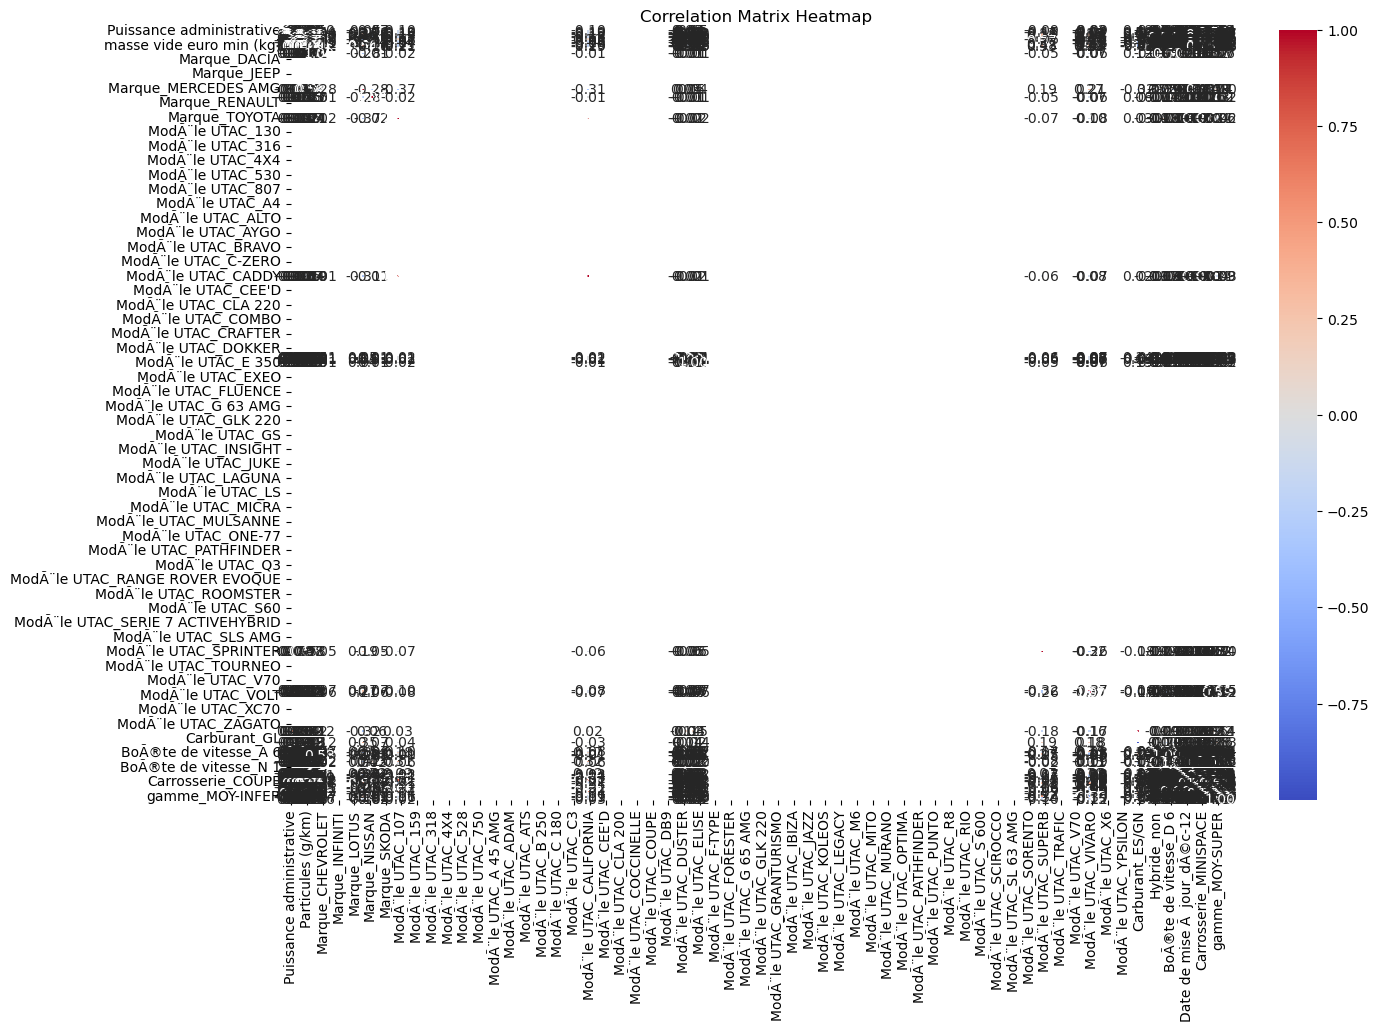

Correlations with the target variable (CO2 (g/km)):
CO2 (g/km)                              1.000000
Consommation extra-urbaine (l/100km)    0.980654
Consommation mixte (l/100km)            0.969864
Consommation urbaine (l/100km)          0.917270
masse vide euro min (kg)                0.706037
                                          ...   
Date de mise Ã  jour_dÃ©c-12                 NaN
Carrosserie_MINISPACE                        NaN
Carrosserie_MONOSPACE                        NaN
gamme_ECONOMIQUE                             NaN
gamme_MOY-INF                                NaN
Name: CO2 (g/km), Length: 533, dtype: float64


In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Extract the correlations with the target variable
target_correlations = corr_matrix['CO2 (g/km)'].sort_values(ascending=False)

# Display the correlations with the target variable
print("Correlations with the target variable (CO2 (g/km)):")
print(target_correlations)


<Figure size 1500x1000 with 0 Axes>

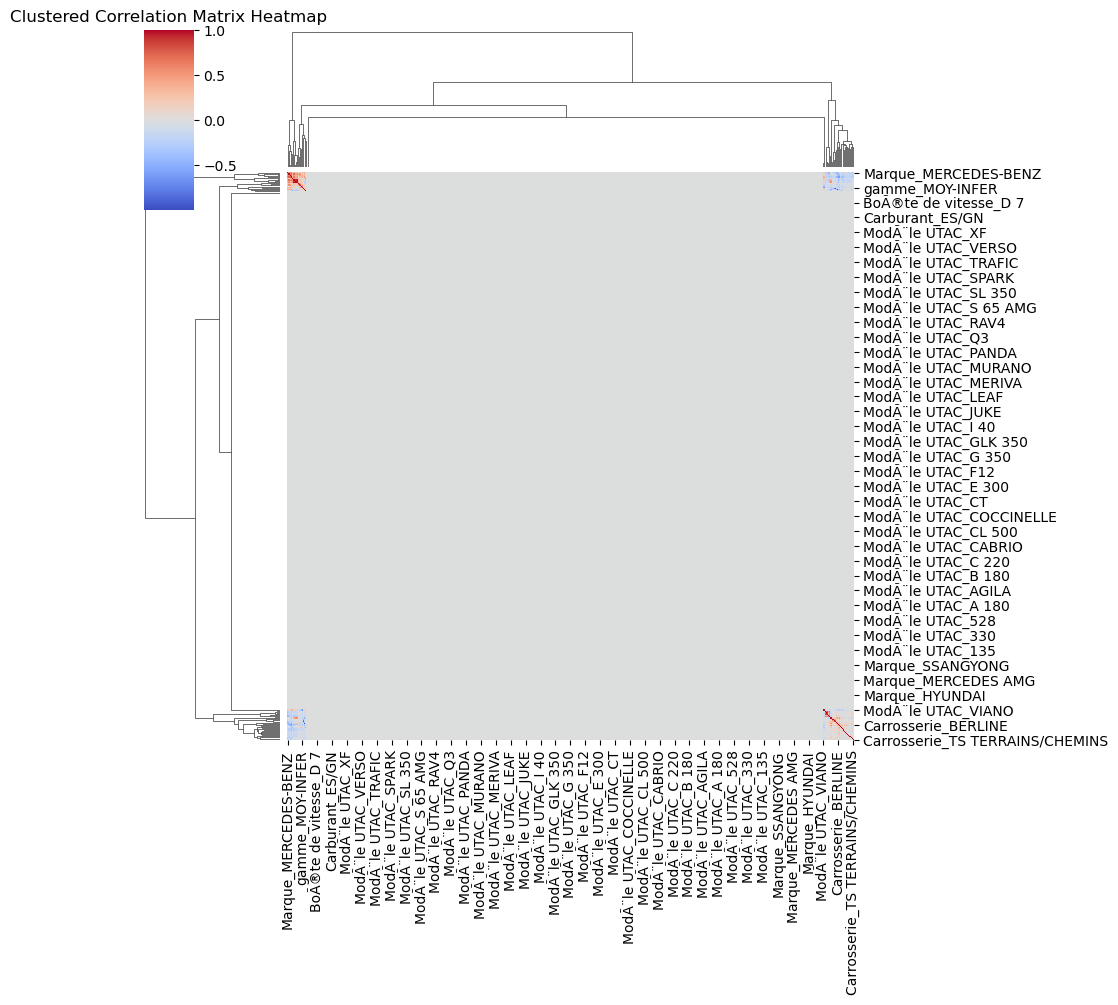

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the correlation matrix
corr_matrix = df.corr()

# Replace NaN values with 0
corr_matrix = corr_matrix.fillna(0)

# Generate a linkage matrix for hierarchical clustering
linkage_matrix = linkage(corr_matrix, method='ward')

# Plot the clustered heatmap
plt.figure(figsize=(15, 10))
sns.clustermap(corr_matrix, annot=False, cmap='coolwarm', cbar=True, row_linkage=linkage_matrix, col_linkage=linkage_matrix)
plt.title('Clustered Correlation Matrix Heatmap')
plt.show()


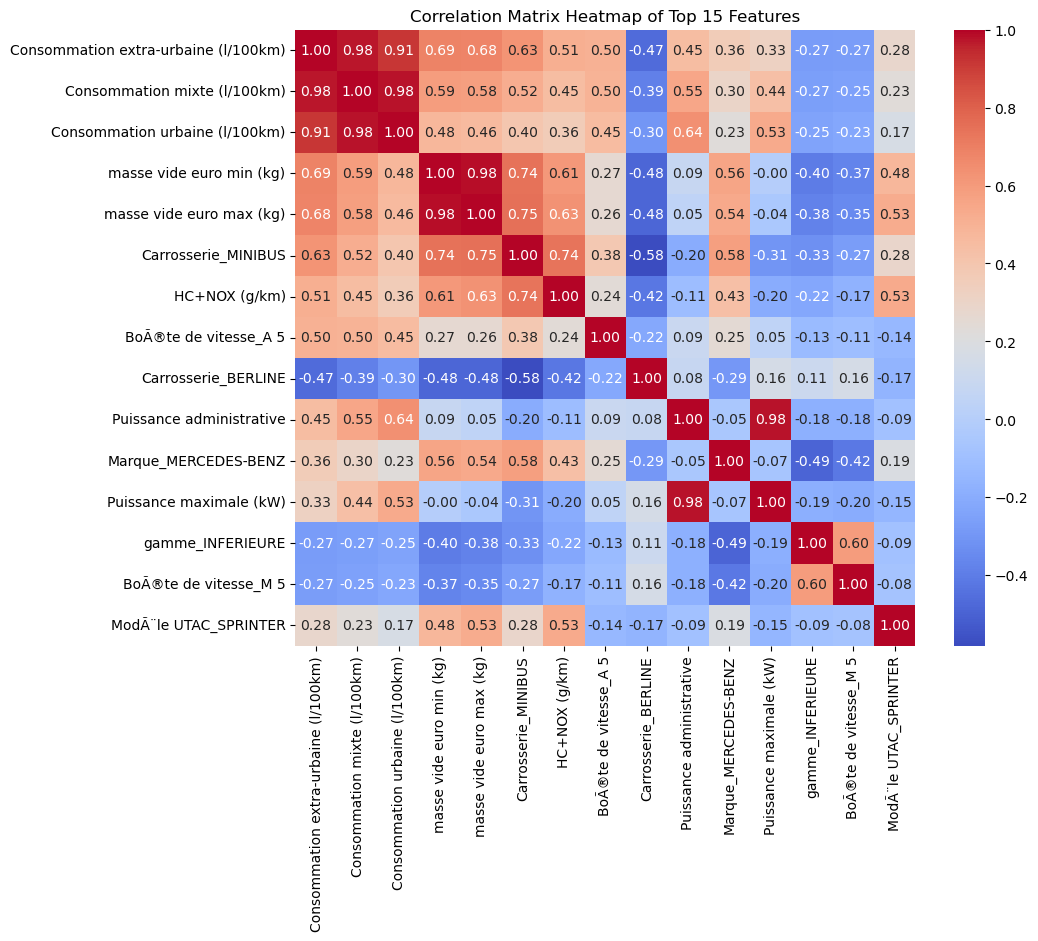

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Extract the correlations with the target variable
target_correlations = corr_matrix['CO2 (g/km)'].abs().sort_values(ascending=False)

# Select top 10 features most correlated with the target variable
top_features = target_correlations.index[1:16]  # Exclude the target itself
selected_corr_matrix = df[top_features].corr()

# Plot the heatmap for the selected features
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap of Top 15 Features')
plt.show()


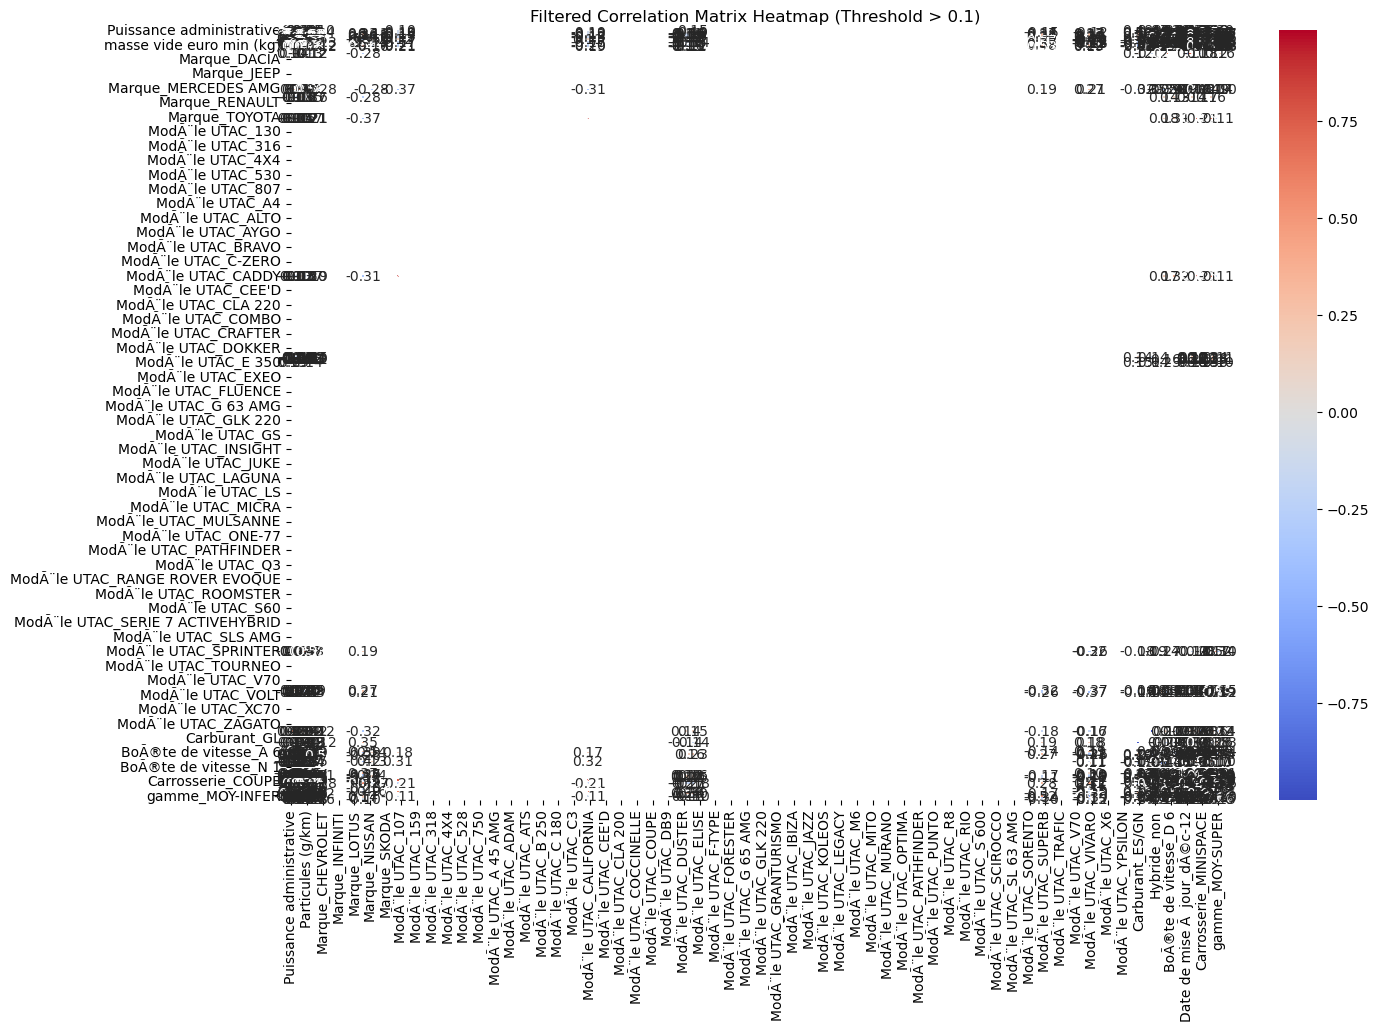

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Set a threshold for filtering correlations
threshold = 0.1

# Filter the correlation matrix
filtered_corr_matrix = corr_matrix[(corr_matrix.abs() > threshold) & (corr_matrix != 1.0)]

# Plot the heatmap for the filtered correlations
plt.figure(figsize=(15, 10))
sns.heatmap(filtered_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Filtered Correlation Matrix Heatmap (Threshold > 0.1)')
plt.show()
